# Bank Term Deposit Prediction using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


In [2]:
# Load dataset
df = pd.read_csv('bank-additional.csv', sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [6]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [7]:
# Feature scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df.drop('y', axis=1)), columns=df.columns[:-1])
y = df['y']


In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [9]:
# Model training
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds)
    }

# Print results
pd.DataFrame(results).T


C:\Users\darkt\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:39:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.913835,0.686275,0.388889,0.496454
Decision Tree,0.887136,0.482759,0.466667,0.474576
Random Forest,0.908981,0.659574,0.344444,0.452555
AdaBoost,0.908981,0.653061,0.355556,0.460432
XGBoost,0.905340,0.578947,0.488889,0.530120


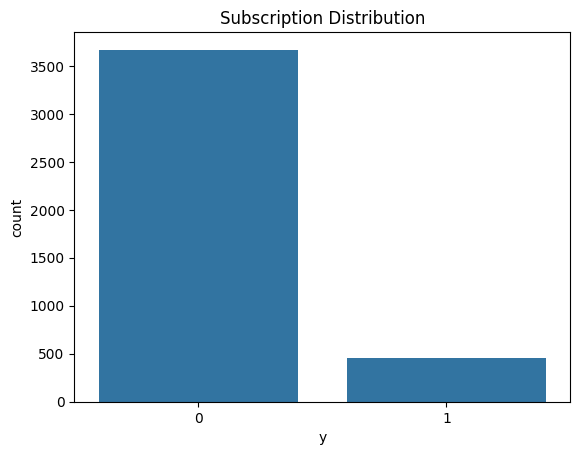

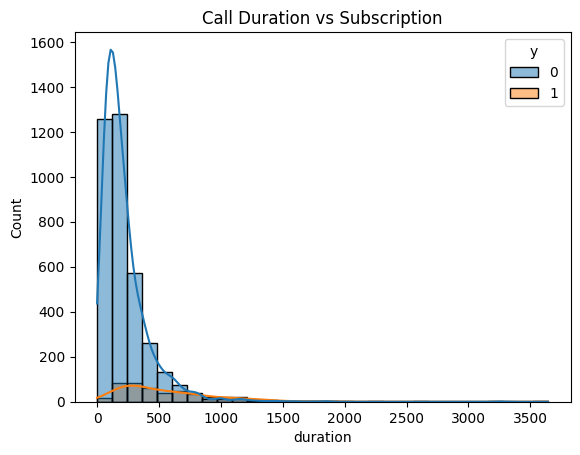

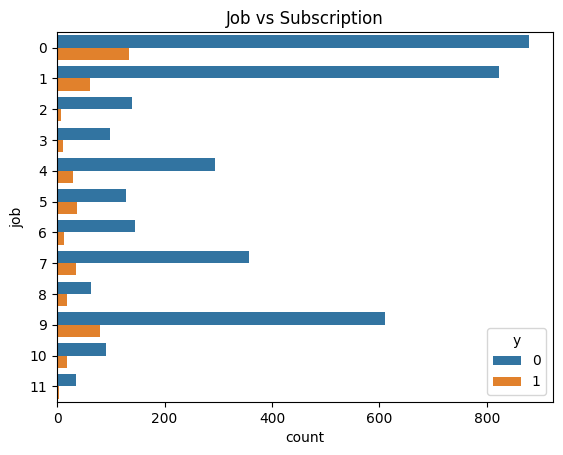

In [10]:
# EDA Plots
sns.countplot(x=df['y'])
plt.title('Subscription Distribution')
plt.show()

sns.histplot(data=df, x='duration', hue='y', bins=30, kde=True)
plt.title('Call Duration vs Subscription')
plt.show()

sns.countplot(data=df, y='job', hue='y')
plt.title('Job vs Subscription')
plt.show()




In [12]:
# FIX: Correct ordering for encoded months using inverse_transform
# Get the mapping from encoded values back to month names
month_encoder = label_encoders['month']
month_labels = list(month_encoder.classes_)  # ['apr', 'aug', ..., 'sep']
month_order_encoded = [month_encoder.transform([month])[0] for month in month_labels]

# Create the countplot using the encoded order
sns.countplot(data=df, x='month', hue='y', order=month_order_encoded)
plt.title('Subscription by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=month_order_encoded, labels=month_labels, rotation=45)
plt.show()


KeyError: 'month'

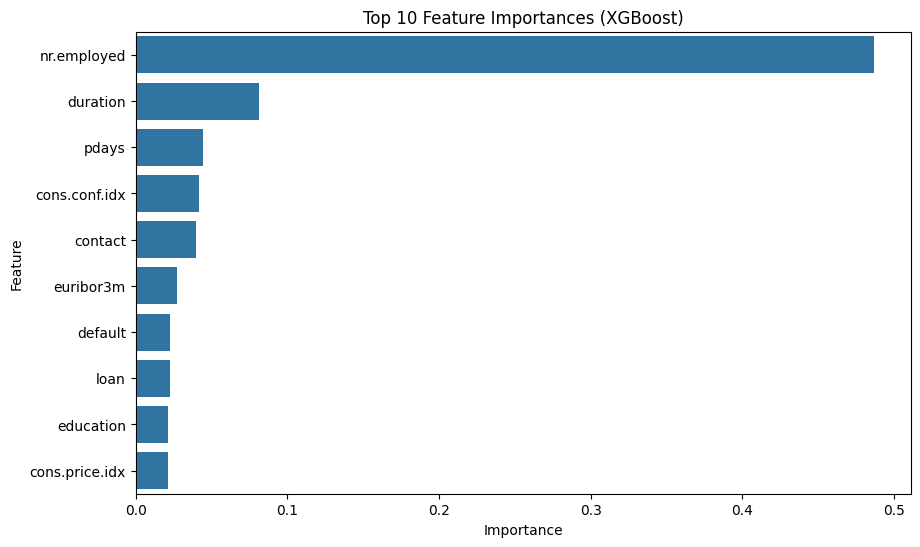

In [13]:
# Feature importance for XGBoost
xgb_model = models["XGBoost"]
importances = xgb_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()


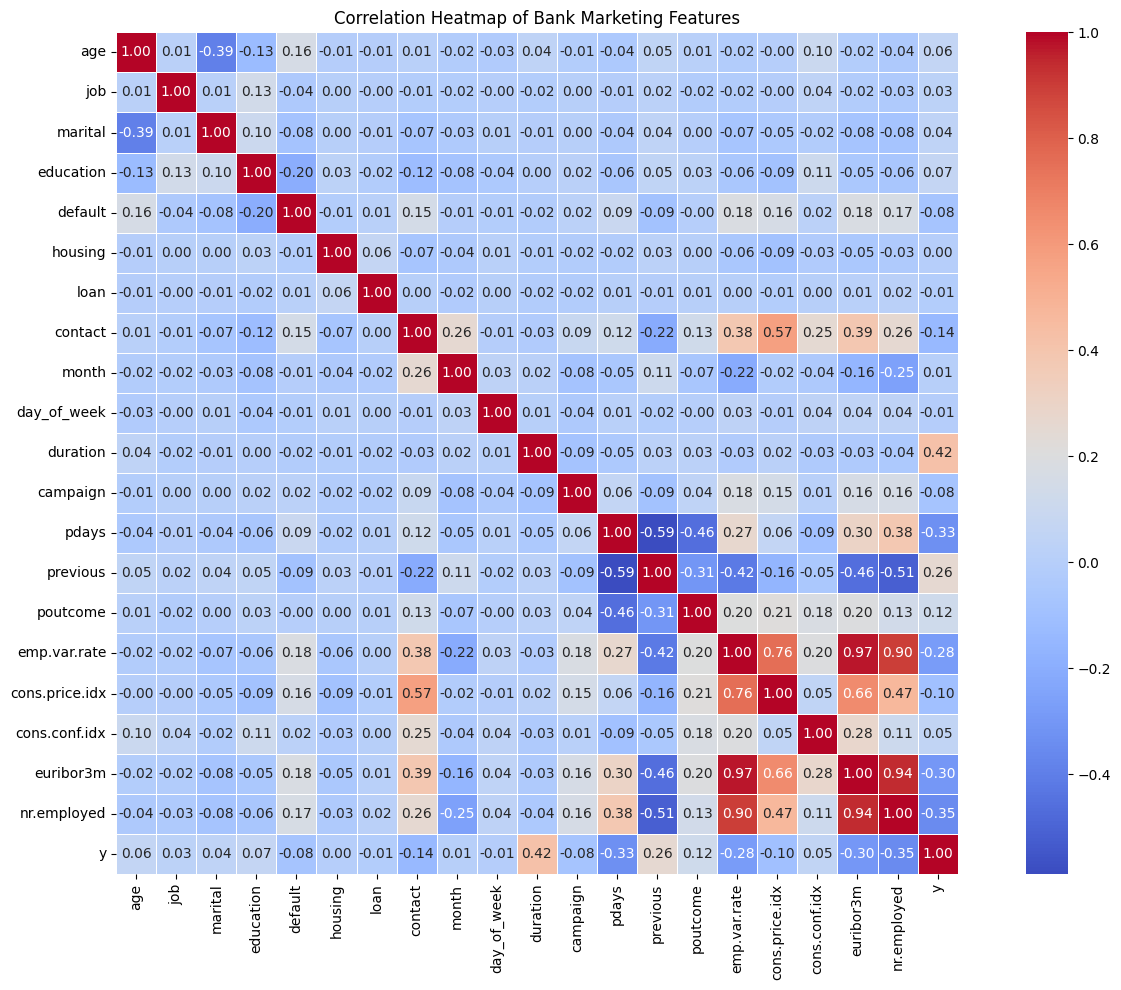

In [14]:
# Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables for correlation calculation
encoded_df = df.copy()
label_encoders = {}
for col in encoded_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col])
    label_encoders[col] = le

# Compute the correlation matrix
corr_matrix = encoded_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Bank Marketing Features")
plt.tight_layout()
plt.show()
